<a href="https://colab.research.google.com/github/Purbasa2003/Cat_vs_Dog_Image_Classifier/blob/main/Cats_vs_Dogs_Image_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Cat vs Dog Image Classifier : Develop an image classification model to distinguish between images of cats and dogs using data science techniques in Python.***


# Loading the dataset of images directly from KAGGLE

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


# Unzip the dataset file

In [ ]:
import zipfile

In [ ]:
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip')
zip_ref.extractall('/content')
zip_ref.close()

# Training the dataset

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
train_dataset = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

validation_dataset = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


# Normalizing the Image-Dataset

In [ ]:
def process (image, label):
  image = tf.cast(image/255. ,tf.float32)
  return image, label

train_dataset = train_dataset.map(process)
validation_dataset = validation_dataset.map(process)

# Creating a CNN Model

In [ ]:
model = Sequential()

model.add(Conv2D(32, kernel_size = (3,3), padding = 'valid', activation = 'relu', input_shape = (256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))

model.add(Conv2D(64, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))

model.add(Conv2D(128, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0,1))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0,1))
model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

# Compiling & Executing the Model

In [ ]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(train_dataset, epochs = 10, validation_data = validation_dataset)

Epoch 1/10
625/625 [==============================] - 75s 106ms/step - loss: 0.8840 - accuracy: 0.6641 - val_loss: 0.7814 - val_accuracy: 0.6106
Epoch 2/10
625/625 [==============================] - 65s 104ms/step - loss: 0.5064 - accuracy: 0.7618 - val_loss: 0.6866 - val_accuracy: 0.6764
Epoch 3/10
625/625 [==============================] - 65s 103ms/step - loss: 0.4216 - accuracy: 0.8090 - val_loss: 0.4818 - val_accuracy: 0.7704
Epoch 4/10
625/625 [==============================] - 65s 103ms/step - loss: 0.3104 - accuracy: 0.8622 - val_loss: 0.5045 - val_accuracy: 0.7848
Epoch 5/10
625/625 [==============================] - 64s 102ms/step - loss: 0.2204 - accuracy: 0.9090 - val_loss: 0.6572 - val_accuracy: 0.7502
Epoch 6/10
625/625 [==============================] - 67s 107ms/step - loss: 0.1606 - accuracy: 0.9354 - val_loss: 0.7715 - val_accuracy: 0.7958
Epoch 7/10
625/625 [==============================] - 67s 106ms/step - loss: 0.1088 - accuracy: 0.9603 - val_loss: 0.9752 - val_ac

# Visualizing the Dataset

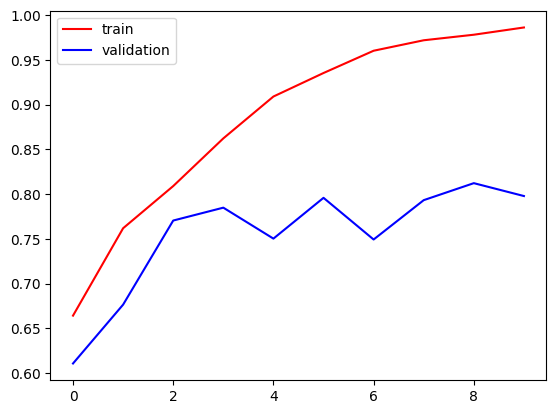

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color = 'red', label = 'train')
plt.plot(history.history['val_accuracy'], color = 'blue', label = 'validation')
plt.legend()
plt.show()

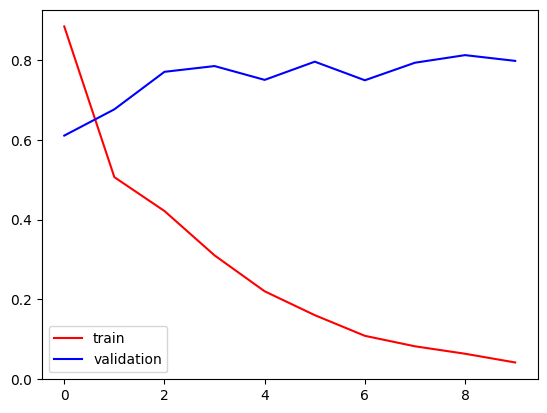

In [ ]:
plt.plot(history.history['loss'], color = 'red', label = 'train')
plt.plot(history.history['val_accuracy'], color = 'blue', label = 'validation')
plt.legend()
plt.show()

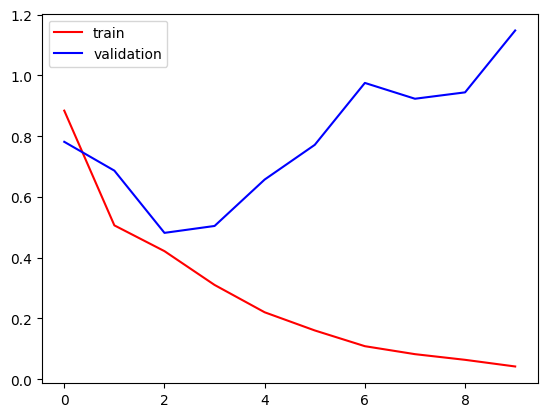

In [ ]:
plt.plot(history.history['loss'], color = 'red', label = 'train')
plt.plot(history.history['val_loss'], color = 'blue', label = 'validation')
plt.legend()
plt.show()

# Testing Model

**Trial1**

In [ ]:
import cv2
test_image = cv2.imread('/content/cat1image.jpeg')

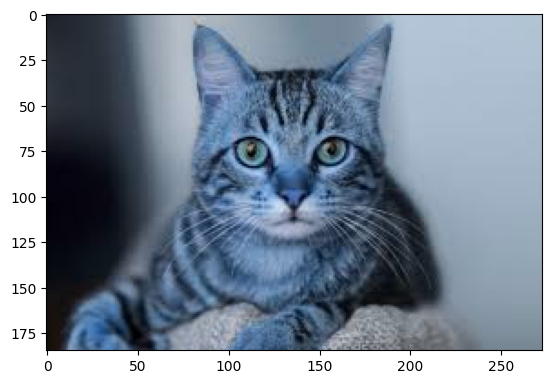

In [ ]:
plt.imshow(test_image)

In [ ]:
test_image.shape

(185, 273, 3)

In [ ]:
test_image = cv2.resize(test_image, (256, 256))
test_input = test_image.reshape(1, 256, 256, 3)

In [ ]:
# 0 --> CAT
# 1 --> DOG

model.predict(test_input)

1/1 [==============================] - 0s 395ms/step


array([[0.]], dtype=float32)

**Trial2**

In [ ]:
test_image = cv2.imread('/content/dog1image.jpeg')

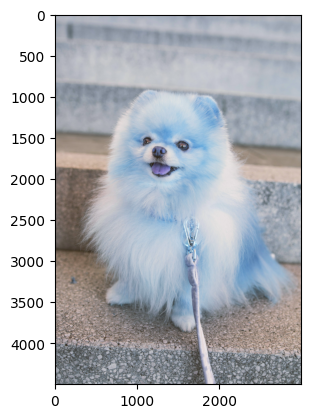

In [ ]:
plt.imshow(test_image)

In [ ]:
test_image.shape

(4500, 3000, 3)

In [ ]:
test_image = cv2.resize(test_image, (256, 256))
test_input = test_image.reshape(1, 256, 256, 3)

In [ ]:
# 0 --> CAT
# 1 --> DOG

model.predict(test_input)

1/1 [==============================] - 0s 18ms/step


array([[1.]], dtype=float32)